In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# supress warnings 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing data
df = pd.read_csv(r'C:\Users\Abhi\Documents\MS in Data Science - IIIT B\Course2 - Machine Learning-1\Lead Score Case Study\Lead Scoring Assignment\Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [5]:
df.shape

(9240, 37)

In [ ]:
# Visualizing occurence of Null values in the columns based on rows

# plt.figure(figsize=(10,10))
# sns.heatmap(df.isnull(), cbar=False)

# plt.tight_layout()
# plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning 

#### There are 'select' values for many column , this is because customer did not select any option from the list, hence it shows select . Converting 'Select' values to NaN.

In [8]:
df = df.replace('Select', np.nan)

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# checking for Nulll values in columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
df.columns.unique()

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
for col in df.columns:
    print(col.upper(), end=': ')
    print(df[col].unique())
    print()

PROSPECT ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

LEAD NUMBER: [660737 660728 660727 ... 579545 579538 579533]

LEAD ORIGIN: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

LEAD SOURCE: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

DO NOT EMAIL: ['No' 'Yes']

DO NOT CALL: ['No' 'Yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 1

In [14]:
# Column "how_did_you" has too many NA values that can not be imputed. It is better to drop the column. 
df.drop('How did you hear about X Education', axis=1, inplace=True)

In [15]:
# rechecking the shape
df.shape

(9240, 36)

In [16]:
df.drop('Lead Profile', axis=1, inplace=True)

In [17]:
df.shape

(9240, 35)

In [18]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [19]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [20]:
# Dropping unique valued columns
df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1, inplace=True) 

In [21]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [22]:
#checking null values percentage

round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free copy of Mastering The Interview            0.00
Lead Origin                                       0.00
Newspaper 

In [23]:
# dropping all above 45%

df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality'], axis=1, inplace=True)

In [24]:
df.shape

(9240, 23)

In [25]:
#checking null values percentage

round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

In [26]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

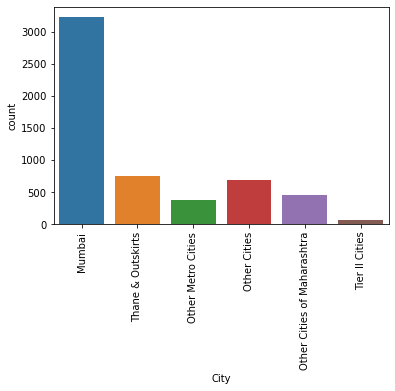

In [28]:
sns.countplot(x='City', data=df)
plt.xticks(rotation=90)
plt.show()

In [29]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values

df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [30]:
df.City.value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
# specialization

df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

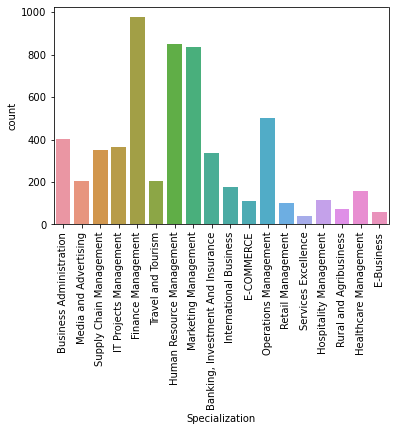

In [33]:
# graphical representation by countplot
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)
plt.show()

#### Could be possible that lead has not entered any specialization if his/her option is not availabe on the list.
####  Hence we can make a category "Others" for missing values

In [34]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [35]:
# confirming if 'Others' Category added
df.Specialization.value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
City                                              0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Specialization                                    0.00
Total Time

In [37]:
# Analysing Tags column

df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [38]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

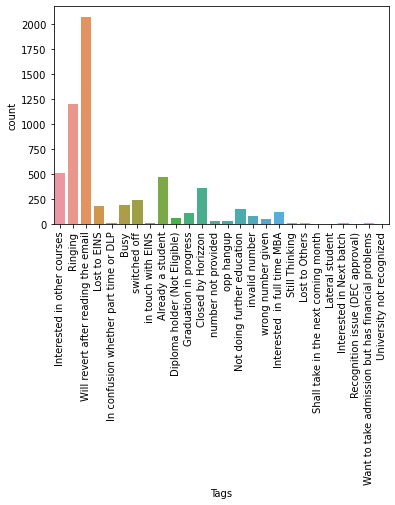

In [39]:
# graphical representation by countplot
sns.countplot(x='Tags', data=df)
plt.xticks(rotation=90)
plt.show()

#### Blanks in the tag column may be imputed by 'Will revert after reading the email'

In [40]:
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [41]:
df.Tags.value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [42]:
# Analysing 'What matters most to you in choosing a course' column

df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [43]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [44]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [45]:
# confirming the changes made

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
# Analysing 'What is your current occupation' column
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [48]:
# confirming the changes made
df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
# Analysing the 'country' column

df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [50]:
# India constitutes the most values so lets impute the same 

df['Country'] = df['Country'].replace(np.nan, 'India')

In [51]:
# confirming the changes made

df.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [52]:
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
City                                             0.00
Tags                                             0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
What is your current occupation                  0.00
Search                                           0.00
What matters most to you in choosing a course    0.00
Specialization                                   0.00
Country                                          0.00
Total Time Spent on Website 

In [53]:
df.TotalVisits.value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [54]:
# Few columns have less than 2% na values. We can afford to drop their respective rows altogehter.
df.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity','Lead Source'], inplace=True)

In [55]:
# validating if there are any null values
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [56]:
df.shape

(9074, 23)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

## Exploratory Data Analysis

### Univariate Analysis

In [58]:
# checking Imbalance in data 
round((df.Converted.value_counts(normalize=True)*100), 2)

0    62.14
1    37.86
Name: Converted, dtype: float64

In [59]:
#Identify Imbalance of Target variable 'Converted'

Not_Converted = round((df.Converted.value_counts(normalize=True)*100)[0], 2)
Converted = round((df.Converted.value_counts(normalize=True)*100)[1], 2)
Imbalance = round(Not_Converted/Converted, 2)

print("Not_Converted :", Not_Converted)
print("Converted :", Converted )      
print("Imbalance :", Imbalance )

Not_Converted : 62.14
Converted : 37.86
Imbalance : 1.64


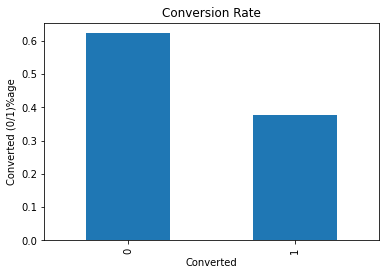

In [231]:
plt.xlabel('Converted')
plt.ylabel('Converted (0/1)%age')
plt.title('Conversion Rate')
df.Converted.value_counts(normalize=True).plot.bar()
plt.show()

### Lead Origin

In [60]:
df['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

In [61]:
df.groupby(['Lead Origin'])['Converted'].mean()

Lead Origin
API                        0.311627
Landing Page Submission    0.361720
Lead Add Form              0.936317
Lead Import                0.300000
Name: Converted, dtype: float64

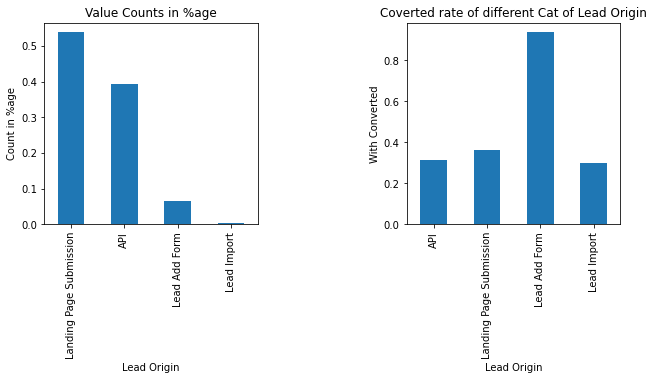

In [62]:
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
plt.xlabel('Lead Origin')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Lead Origin'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Lead Origin')
df.groupby(['Lead Origin'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

### Inference

- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable
- Lead Import are very less in count, however have a conversion rate of ~28-30%

#### Recommendation
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### Lead Source

In [63]:
df['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [64]:
df.groupby(['Lead Source'])['Converted'].mean()

Lead Source
Click2call           0.750000
Direct Traffic       0.321667
Facebook             0.290323
Google               0.399930
Live Chat            1.000000
NC_EDM               1.000000
Olark Chat           0.255562
Organic Search       0.377816
Pay per Click Ads    0.000000
Press_Release        0.000000
Reference            0.925508
Referral Sites       0.248000
Social Media         0.500000
WeLearn              1.000000
Welingak Website     0.984496
bing                 0.166667
blog                 0.000000
google               0.000000
testone              0.000000
welearnblog_Home     0.000000
youtubechannel       0.000000
Name: Converted, dtype: float64

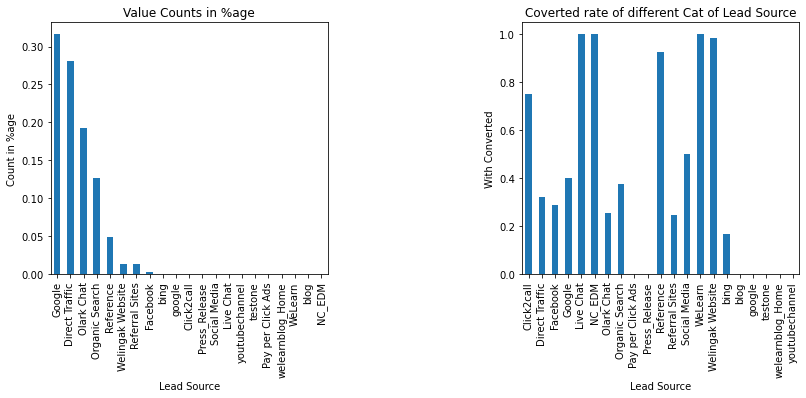

In [65]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Lead Source')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Lead Source'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Lead Source')
df.groupby(['Lead Source'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

In [66]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

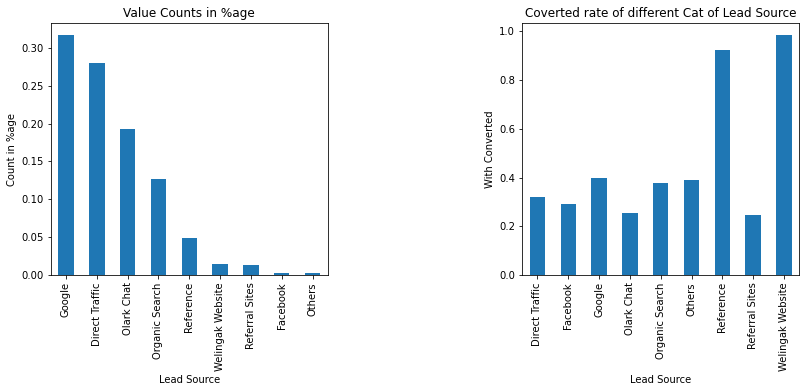

In [67]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Lead Source')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Lead Source'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Lead Source')
df.groupby(['Lead Source'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

### Inference 
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

### Recommendation
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Do Not Email & Do Not Call

In [68]:
df['Do Not Email'].value_counts(normalize=True)*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

In [69]:
df.groupby(['Do Not Email'])['Converted'].mean()

Do Not Email
No     0.398540
Yes    0.145251
Name: Converted, dtype: float64

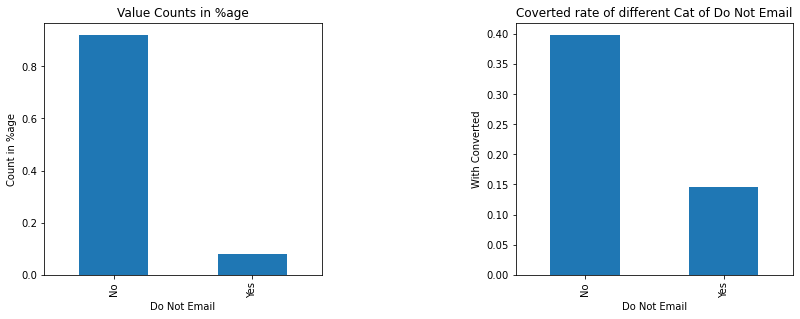

In [70]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Do Not Email')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Do Not Email'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Do Not Email')
df.groupby(['Do Not Email'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

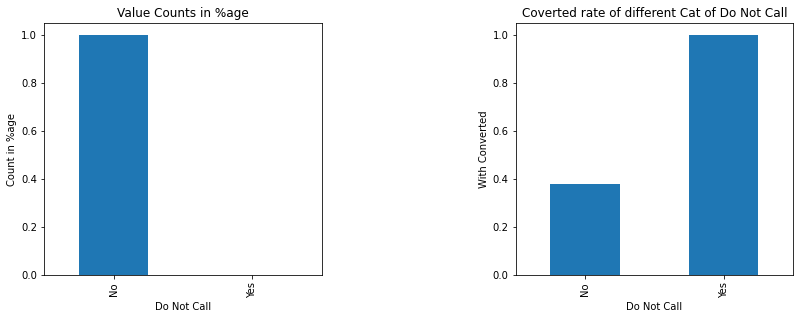

In [71]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Do Not Call')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Do Not Call'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Do Not Call')
df.groupby(['Do Not Call'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## Total Visits

In [72]:
df['TotalVisits'].describe(percentiles=[0.05, .25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

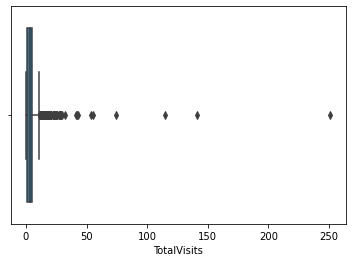

In [73]:
ax = sns.boxplot(x='TotalVisits', data=df)

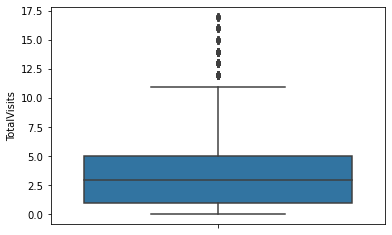

In [74]:
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]

Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]

sns.boxplot(y = df['TotalVisits'])
plt.show()

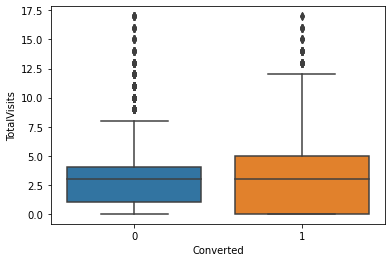

In [75]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

## Inference
- Median for converted and not converted leads are the same.
#### Nothng conclusive can be said on the basis of Total Visits.

## Total Time Spent on Website

In [76]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

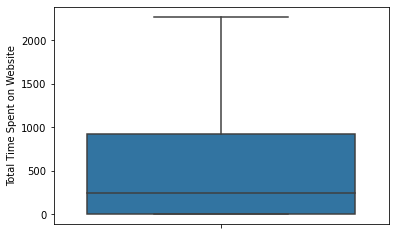

In [77]:
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

#### Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

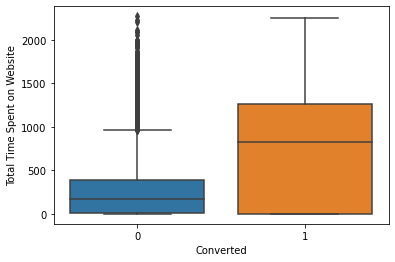

In [78]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

## Inference
- Leads spending more time on the weblise are more likely to be converted.

#### Website should be made more engaging to make leads spend more time

## Page views per visit

In [79]:
#checking percentiles for "Page views per visit"

df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

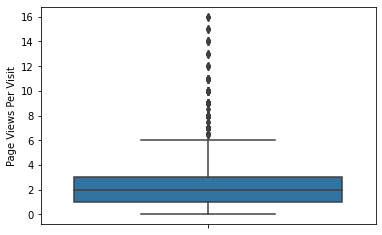

In [80]:
ax = sns.boxplot(y=df['Page Views Per Visit'])

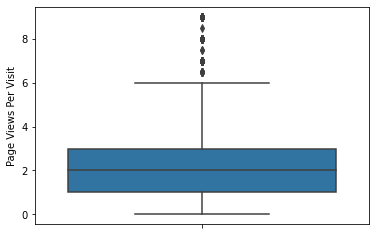

In [81]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]

Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [82]:
df.shape

(8924, 23)

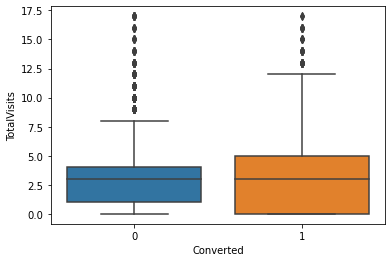

In [83]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

### Inference
- Median for converted and non-converted leads is the same

#### Nothing can be said specifically for lead conversion from Page Views Per Visit

## Last Activity

In [84]:
df['Last Activity'].value_counts(normalize=True, dropna=False)*100

Email Opened                    37.931421
SMS Sent                        30.008965
Olark Chat Conversation         10.824742
Page Visited on Website          6.656208
Converted to Lead                4.796056
Email Bounced                    3.473779
Email Link Clicked               2.958315
Form Submitted on Website        1.277454
Unreachable                      0.986105
Unsubscribed                     0.649933
Had a Phone Conversation         0.268938
Approached upfront               0.056029
View in browser link Clicked     0.044823
Email Received                   0.022411
Email Marked Spam                0.022411
Visited Booth in Tradeshow       0.011206
Resubscribed to emails           0.011206
Name: Last Activity, dtype: float64

In [85]:
df.groupby(['Last Activity'])['Converted'].mean()

Last Activity
Approached upfront              1.000000
Converted to Lead               0.126168
Email Bounced                   0.051613
Email Link Clicked              0.272727
Email Marked Spam               1.000000
Email Opened                    0.361595
Email Received                  1.000000
Form Submitted on Website       0.236842
Had a Phone Conversation        0.791667
Olark Chat Conversation         0.083851
Page Visited on Website         0.237374
Resubscribed to emails          1.000000
SMS Sent                        0.628454
Unreachable                     0.329545
Unsubscribed                    0.224138
View in browser link Clicked    0.000000
Visited Booth in Tradeshow      0.000000
Name: Converted, dtype: float64

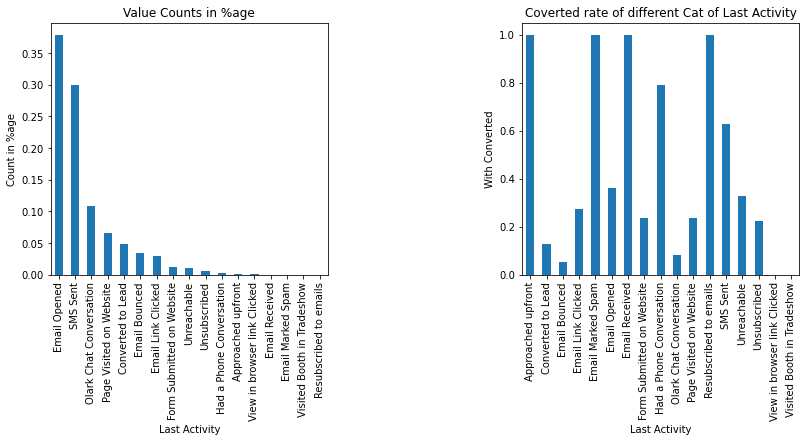

In [86]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Last Activity')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Last Activity'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Last Activity')
df.groupby(['Last Activity'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

In [87]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

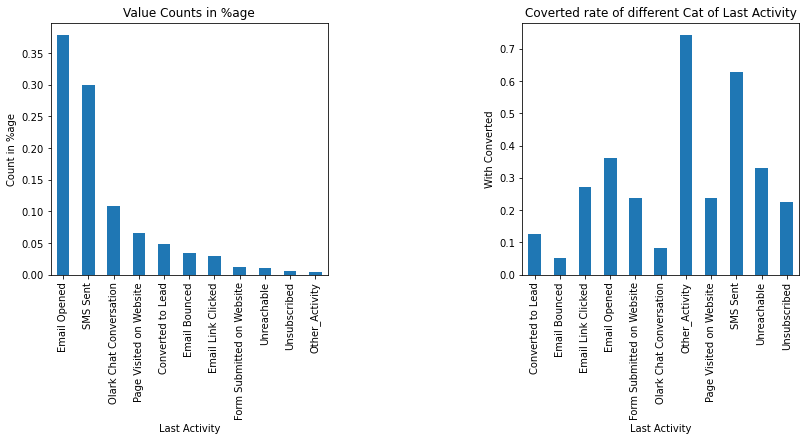

In [88]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Last Activity')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Last Activity'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Last Activity')
df.groupby(['Last Activity'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## Inference
- Most of the lead have their Email opened as their last activity
- Conversion rate for leads with last activity as SMS Sent is almost 60%

## Country

In [89]:
df.Country.value_counts()

India                   8641
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Canada                     4
unknown                    4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
China                      2
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Italy                      2
Ghana                      2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Tanzania                   1
Netherlands                1
Malaysia                   1
Kenya         

## Inference
- Most values are 'India' no such inference can be drawn

## Specialization

In [90]:
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')

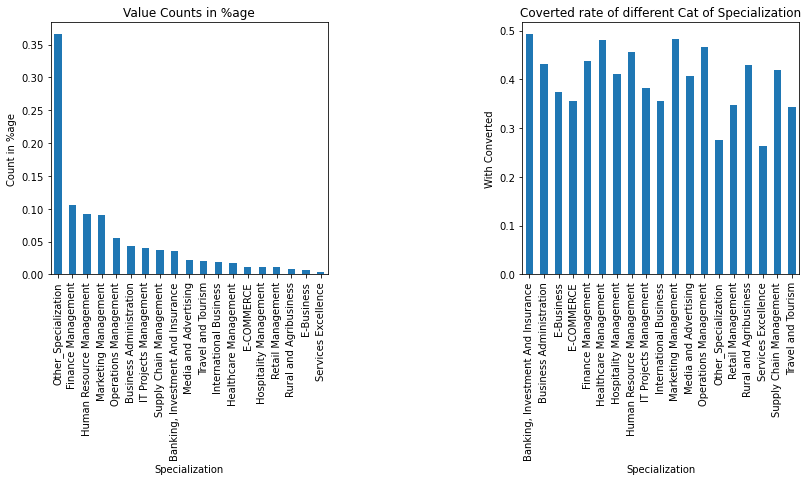

In [91]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Specialization')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Specialization'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Specialization')
df.groupby(['Specialization'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## Inference
- Focus should be more on the Specialization with high conversion rate

## Occupation

In [92]:
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.948454
Working Professional     7.451815
Student                  2.274765
Other                    0.145675
Housewife                0.100852
Businessman              0.078440
Name: What is your current occupation, dtype: float64

In [93]:
100*df.groupby(['What is your current occupation'])['Converted'].mean().sort_values(ascending=False)

What is your current occupation
Housewife               100.000000
Working Professional     91.729323
Businessman              57.142857
Other                    53.846154
Student                  34.975369
Unemployed               33.237822
Name: Converted, dtype: float64

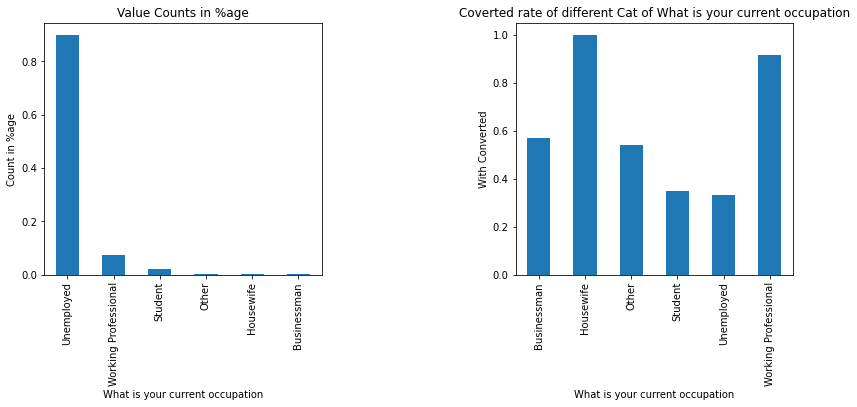

In [94]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('What is your current occupation')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['What is your current occupation'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of What is your current occupation')
df.groupby(['What is your current occupation'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## Inference
- Working Professional have high conversion rate
- Unemployed leads are high in number but has 30-35% conversion rate

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8924 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Do Not Email                                   8924 non-null   object 
 3   Do Not Call                                    8924 non-null   object 
 4   Converted                                      8924 non-null   int64  
 5   TotalVisits                                    8924 non-null   float64
 6   Total Time Spent on Website                    8924 non-null   int64  
 7   Page Views Per Visit                           8924 non-null   float64
 8   Last Activity                                  8924 non-null   object 
 9   Country                                        8924 

### What matters most to you in choosing a course

In [96]:
df['What matters most to you in choosing a course'].describe()

count                        8924
unique                          3
top       Better Career Prospects
freq                         8922
Name: What matters most to you in choosing a course, dtype: object

- Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

### Search

In [97]:
df.Search.describe()

count     8924
unique       2
top         No
freq      8911
Name: Search, dtype: object

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Tags

In [98]:
df.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  58.953384
Ringing                                              12.998655
Interested in other courses                           5.658897
Already a student                                     5.165845
Closed by Horizzon                                    3.249664
switched off                                          2.655760
Busy                                                  2.050650
Lost to EINS                                          1.882564
Not doing further education                           1.535186
Interested  in full time MBA                          1.299866
Graduation in progress                                1.232631
invalid number                                        0.907665
Diploma holder (Not Eligible)                         0.705961
wrong number given                                    0.515464
opp hangup                                            0.369789
number not provided                                   0

In [99]:
100*df.groupby(['Tags'])['Converted'].mean().sort_values(ascending=False)

Tags
Lateral student                                      100.000000
Interested in Next batch                             100.000000
Closed by Horizzon                                    99.310345
Lost to EINS                                          97.619048
Busy                                                  56.284153
Will revert after reading the email                   51.910283
Shall take in the next coming month                   50.000000
in touch with EINS                                    25.000000
In confusion whether part time or DLP                 20.000000
Want to take admission but has financial problems     20.000000
Still Thinking                                        16.666667
opp hangup                                             9.090909
Graduation in progress                                 6.363636
Ringing                                                2.844828
Interested  in full time MBA                           2.586207
Interested in other courses        

In [100]:
# Let's keep considerable last activities as such and club all others to "Other_Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

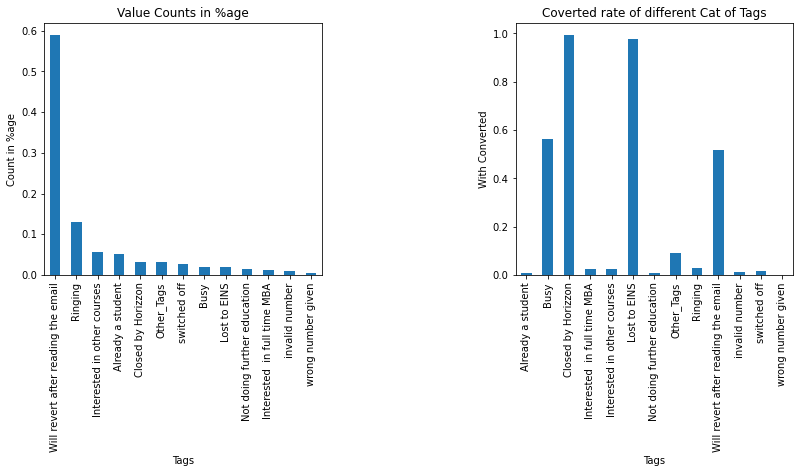

In [101]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Tags')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Tags'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Tags')
df.groupby(['Tags'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## City

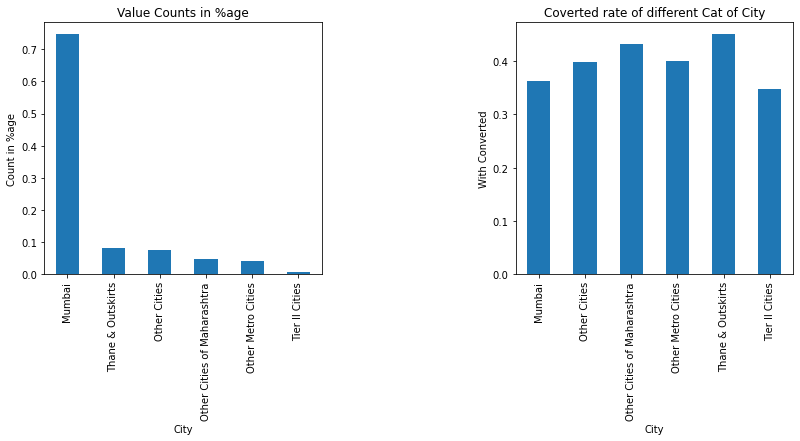

In [102]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('City')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['City'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of City')
df.groupby(['City'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

- Most leads are from mumbai with around 30% conversion rate

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8924 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Do Not Email                                   8924 non-null   object 
 3   Do Not Call                                    8924 non-null   object 
 4   Converted                                      8924 non-null   int64  
 5   TotalVisits                                    8924 non-null   float64
 6   Total Time Spent on Website                    8924 non-null   int64  
 7   Page Views Per Visit                           8924 non-null   float64
 8   Last Activity                                  8924 non-null   object 
 9   Country                                        8924 

### Last Notable Activity

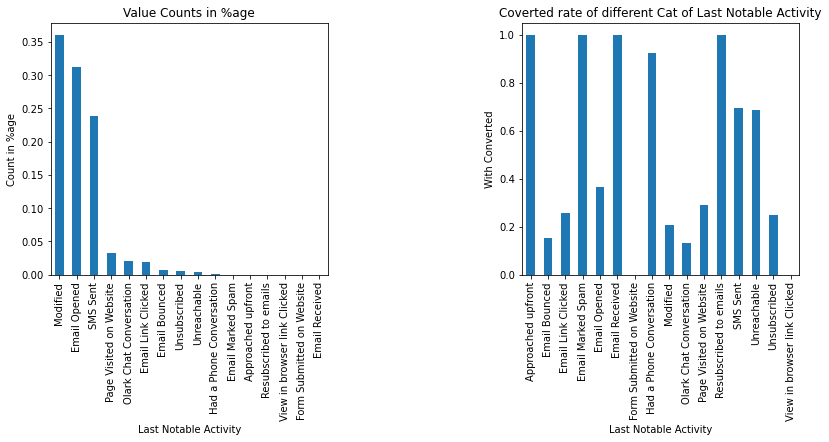

In [104]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.xlabel('Last Notable Activity')
plt.ylabel('Count in %age')
plt.title('Value Counts in %age')
df['Last Notable Activity'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.ylabel('With Converted')
plt.title('Coverted rate of different Cat of Last Notable Activity')
df.groupby(['Last Notable Activity'])['Converted'].mean().plot.bar()

plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)

plt.show()

## Results

- Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8924 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Do Not Email                                   8924 non-null   object 
 3   Do Not Call                                    8924 non-null   object 
 4   Converted                                      8924 non-null   int64  
 5   TotalVisits                                    8924 non-null   float64
 6   Total Time Spent on Website                    8924 non-null   int64  
 7   Page Views Per Visit                           8924 non-null   float64
 8   Last Activity                                  8924 non-null   object 
 9   Country                                        8924 

In [106]:
df = df.drop(['What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country', 'Tags'],axis=1)

In [107]:
df.shape

(8924, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8924 non-null   object 
 1   Lead Source                      8924 non-null   object 
 2   Do Not Email                     8924 non-null   object 
 3   Do Not Call                      8924 non-null   object 
 4   Converted                        8924 non-null   int64  
 5   TotalVisits                      8924 non-null   float64
 6   Total Time Spent on Website      8924 non-null   int64  
 7   Page Views Per Visit             8924 non-null   float64
 8   Last Activity                    8924 non-null   object 
 9   Specialization                   8924 non-null   object 
 10  What is your current occupation  8924 non-null   object 
 11  City                             8924 non-null   object 
 12  Last Notable Activit

## Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [109]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [110]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai,Modified


### For categorical variables with multiple levels, lets create dummy features

In [111]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0


In [113]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [114]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


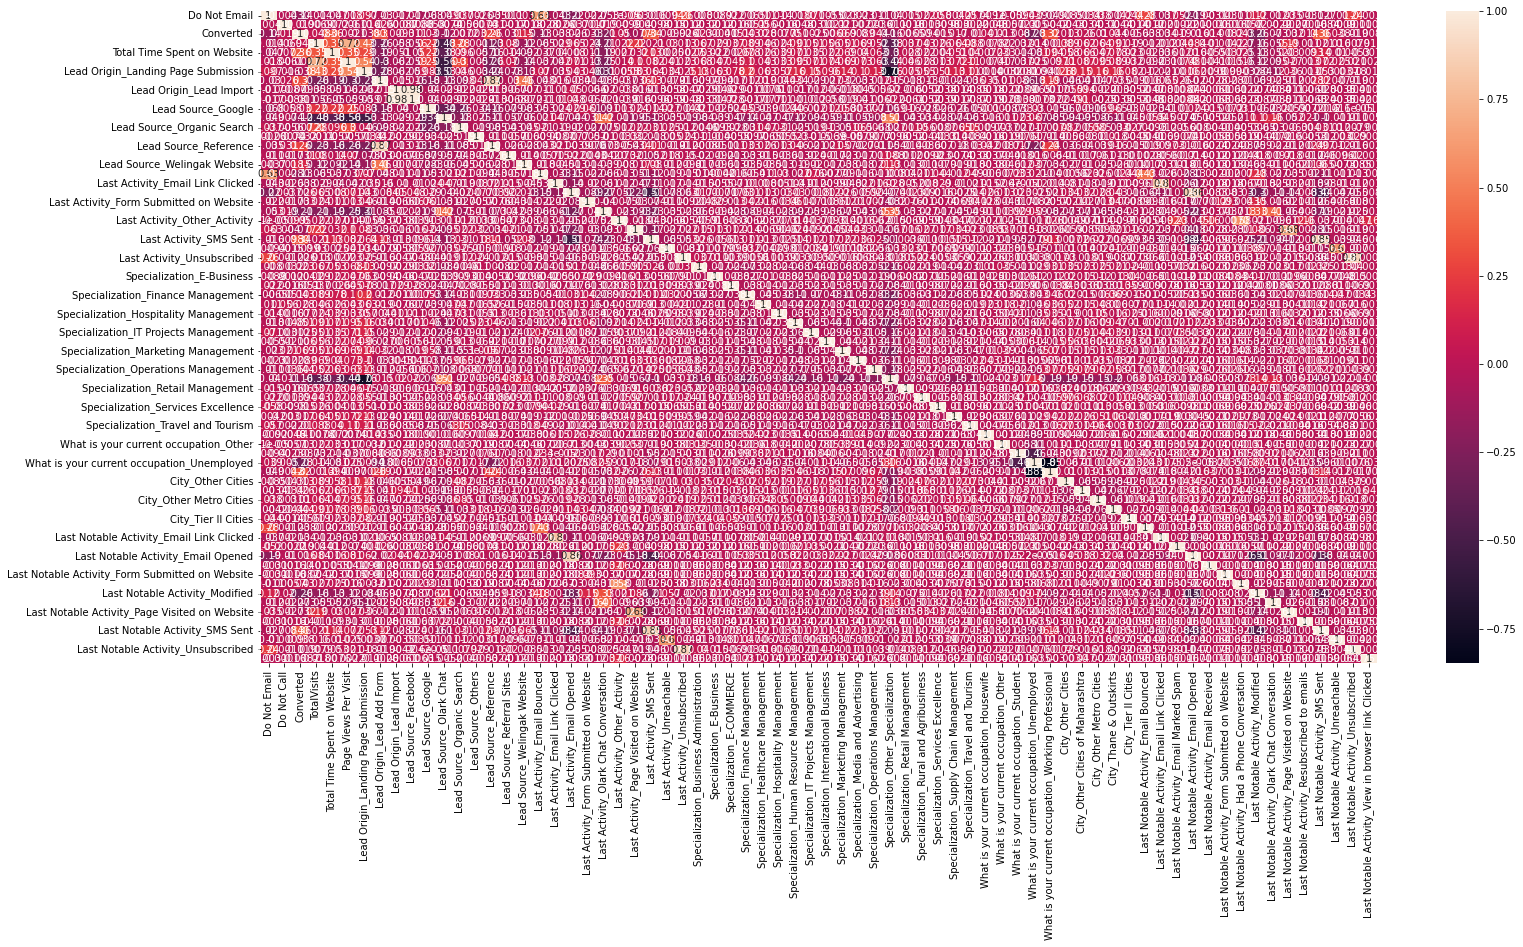

In [215]:
# To check the correlation among varibles
plt.figure(figsize = (25,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

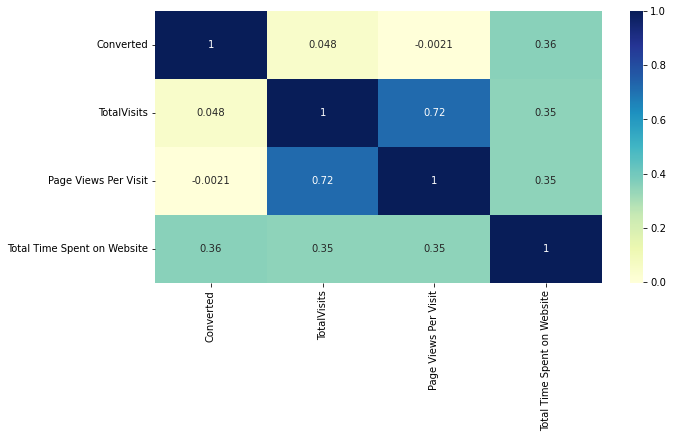

In [218]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr(), cmap="YlGnBu", annot=True)
plt.show()

- It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

## Train-Test split

In [116]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [117]:
# Assingning response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6676,0,0,0.176471,0.548856,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6138,0,0,0.235294,0.359155,0.444444,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8650,0,0,0.176471,0.496479,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3423,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6552,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(6246,)
(6246, 69)
(2678,)
(2678, 69)


## Model Building 

In [121]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [122]:
# Import RFE
from sklearn.feature_selection import RFE

In [123]:
# Running RFE with 20 variables as output
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [124]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', True, 1),
 ('L

In [125]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and

In [126]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [127]:
len(col)

20

In [219]:
y_train.dtype

dtype('int64')

In [128]:
# Selecting columns selected by RFE
X_train = X_train[col]

## Model 1

In [129]:
# Importing statsmodels
import statsmodels.api as sm

#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.4
Date:                Sun, 13 Nov 2022   Deviance:                       5042.9
Time:                        12:51:05   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0544      0.176    -11.675      0.000      -2.399      -1.709
Do Not Email                                            -1.4222      0.199     -7.133      0.000      -1.813      -1.031
TotalVisits                                              1.9147      0.294      6.506      0.000       1.338       2.492
Total Time Spent on Website                              4.4995      0.170     26.524      0.000       4.167       4.832
Page Views Per Visit                                    -1.3908      0.269     -5.164      0.000      -1.919      -0.863
Lead Origin_Landing Page Submission                     -1.0257      0.130     -7.885      0.000      -1.281      -0.771
Lead Origin_Lead Add Form                                1.6491      0.874      1.887      0.059      -0.063       3.362
Lead Source_Olark Chat                                   1.0408      0.138      7.534      0.000       0.770       1.312
Lead Source_Reference                                    1.7173      0.896      1.916      0.055      -0.039       3.474
Lead Source_Welingak Website                             4.0696      1.135      3.584      0.000       1.844       6.295
Last Activity_Email Opened                               0.7811      0.109      7.147      0.000       0.567       0.995
Last Activity_Olark Chat Conversation                   -0.8381      0.190     -4.405      0.000      -1.211      -0.465
Last Activity_Other_Activity                             2.3283      0.626      3.718      0.000       1.101       3.556
Last Activity_SMS Sent                                   0.9081      0.169      5.389      0.000       0.578       1.238
Last Activity_Unsubscribed                               1.4393      0.560      2.570      0.010       0.342       2.537
Specialization_Other_Specialization                     -1.0567      0.127     -8.316      0.000      -1.306      -0.808
What is your current occupation_Housewife               23.0723   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
What is your current occupation_Working Professional     2.5634      0.191     13.389      0.000       2.188       2.939
Last Notable Activity_Had a Phone Conversation          22.2101   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
Last Notable Activity_SMS Sent                           1.4585      0.155      9.406      0.000       1.155       1.762
Last Notable Activity_Unreachable                        2.4973      0.587      4.257      0.000       1.348       3.647
========================================================================================================================
"""

In [130]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Generic function to calculate VIF of variables

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [132]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
5,Lead Origin_Lead Add Form,49.67
7,Lead Source_Reference,39.28
8,Lead Source_Welingak Website,11.62
12,Last Activity_SMS Sent,6.42
3,Page Views Per Visit,6.27
18,Last Notable Activity_SMS Sent,5.07
1,TotalVisits,4.64
4,Lead Origin_Landing Page Submission,3.97
9,Last Activity_Email Opened,2.86
14,Specialization_Other_Specialization,2.81


### dropping 'Last Notable Activity_Had a Phone Conversation' cos of p-value of 0.99

In [133]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [134]:
X_train.shape

(6246, 19)

## Model 2

In [135]:
#BUILDING MODEL #2
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.1
Date:                Sun, 13 Nov 2022   Deviance:                       5048.3
Time:                        12:51:06   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0574      0.176    -11.693      0.000      -2.402      -1.713
Do Not Email                                            -1.4299      0.200     -7.163      0.000      -1.821      -1.039
TotalVisits                                              1.9076      0.294      6.483      0.000       1.331       2.484
Total Time Spent on Website                              4.4919      0.169     26.502      0.000       4.160       4.824
Page Views Per Visit                                    -1.3720      0.269     -5.102      0.000      -1.899      -0.845
Lead Origin_Landing Page Submission                     -1.0213      0.130     -7.853      0.000      -1.276      -0.766
Lead Origin_Lead Add Form                                1.6533      0.874      1.892      0.058      -0.059       3.366
Lead Source_Olark Chat                                   1.0417      0.138      7.540      0.000       0.771       1.312
Lead Source_Reference                                    1.7147      0.896      1.913      0.056      -0.042       3.471
Lead Source_Welingak Website                             4.0701      1.135      3.585      0.000       1.845       6.295
Last Activity_Email Opened                               0.7796      0.109      7.136      0.000       0.565       0.994
Last Activity_Olark Chat Conversation                   -0.8367      0.190     -4.398      0.000      -1.209      -0.464
Last Activity_Other_Activity                             3.0120      0.590      5.108      0.000       1.856       4.168
Last Activity_SMS Sent                                   0.9065      0.168      5.382      0.000       0.576       1.237
Last Activity_Unsubscribed                               1.4448      0.560      2.580      0.010       0.347       2.542
Specialization_Other_Specialization                     -1.0556      0.127     -8.306      0.000      -1.305      -0.807
What is your current occupation_Housewife               23.0712   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
What is your current occupation_Working Professional     2.5606      0.191     13.374      0.000       2.185       2.936
Last Notable Activity_SMS Sent                           1.4578      0.155      9.405      0.000       1.154       1.762
Last Notable Activity_Unreachable                        2.4942      0.587      4.252      0.000       1.344       3.644
========================================================================================================================
"""

In [136]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
5,Lead Origin_Lead Add Form,49.67
7,Lead Source_Reference,39.28
8,Lead Source_Welingak Website,11.62
12,Last Activity_SMS Sent,6.42
3,Page Views Per Visit,6.27
17,Last Notable Activity_SMS Sent,5.07
1,TotalVisits,4.64
4,Lead Origin_Landing Page Submission,3.97
9,Last Activity_Email Opened,2.86
14,Specialization_Other_Specialization,2.81


## dropping 'What is your current occupation_Housewife	' cos of p-value of 0.99

In [137]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [138]:
X_train.shape

(6246, 18)

## Model 3

In [139]:
#BUILDING MODEL #3
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.4
Date:                Sun, 13 Nov 2022   Deviance:                       5058.9
Time:                        12:51:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0519      0.176    -11.671      0.000      -2.396      -1.707
Do Not Email                                            -1.4305      0.200     -7.169      0.000      -1.822      -1.039
TotalVisits                                              1.8964      0.294      6.450      0.000       1.320       2.473
Total Time Spent on Website                              4.4901      0.169     26.521      0.000       4.158       4.822
Page Views Per Visit                                    -1.3816      0.269     -5.141      0.000      -1.908      -0.855
Lead Origin_Landing Page Submission                     -1.0175      0.130     -7.833      0.000      -1.272      -0.763
Lead Origin_Lead Add Form                                1.6448      0.873      1.884      0.060      -0.067       3.356
Lead Source_Olark Chat                                   1.0354      0.138      7.501      0.000       0.765       1.306
Lead Source_Reference                                    1.7205      0.896      1.921      0.055      -0.035       3.476
Lead Source_Welingak Website                             4.0738      1.135      3.589      0.000       1.849       6.298
Last Activity_Email Opened                               0.7881      0.109      7.219      0.000       0.574       1.002
Last Activity_Olark Chat Conversation                   -0.8329      0.190     -4.379      0.000      -1.206      -0.460
Last Activity_Other_Activity                             3.0121      0.590      5.109      0.000       1.857       4.168
Last Activity_SMS Sent                                   0.9064      0.168      5.382      0.000       0.576       1.237
Last Activity_Unsubscribed                               1.4452      0.560      2.581      0.010       0.348       2.542
Specialization_Other_Specialization                     -1.0594      0.127     -8.343      0.000      -1.308      -0.811
What is your current occupation_Working Professional     2.5545      0.191     13.345      0.000       2.179       2.930
Last Notable Activity_SMS Sent                           1.4581      0.155      9.408      0.000       1.154       1.762
Last Notable Activity_Unreachable                        2.4937      0.587      4.251      0.000       1.344       3.643
========================================================================================================================
"""

In [140]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
5,Lead Origin_Lead Add Form,49.67
7,Lead Source_Reference,39.28
8,Lead Source_Welingak Website,11.62
12,Last Activity_SMS Sent,6.42
3,Page Views Per Visit,6.27
16,Last Notable Activity_SMS Sent,5.07
1,TotalVisits,4.64
4,Lead Origin_Landing Page Submission,3.97
9,Last Activity_Email Opened,2.85
14,Specialization_Other_Specialization,2.81


## dropping Lead Origin_Lead Add Form since it has high Vif 

In [141]:
X_train.drop(['Lead Origin_Lead Add Form'], axis = 1, inplace = True)

In [142]:
X_train.shape

(6246, 17)

## Model 4

In [143]:
#BUILDING MODEL #4
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.4
Date:                Sun, 13 Nov 2022   Deviance:                       5062.9
Time:                        12:51:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0115      0.174    -11.529      0.000      -2.354      -1.670
Do Not Email                                            -1.4324      0.200     -7.178      0.000      -1.823      -1.041
TotalVisits                                              1.8810      0.294      6.409      0.000       1.306       2.456
Total Time Spent on Website                              4.4824      0.169     26.517      0.000       4.151       4.814
Page Views Per Visit                                    -1.3994      0.269     -5.212      0.000      -1.926      -0.873
Lead Origin_Landing Page Submission                     -1.0436      0.129     -8.067      0.000      -1.297      -0.790
Lead Source_Olark Chat                                   1.0203      0.138      7.416      0.000       0.751       1.290
Lead Source_Reference                                    3.3371      0.256     13.013      0.000       2.834       3.840
Lead Source_Welingak Website                             5.7026      0.736      7.749      0.000       4.260       7.145
Last Activity_Email Opened                               0.7882      0.109      7.233      0.000       0.575       1.002
Last Activity_Olark Chat Conversation                   -0.8386      0.190     -4.411      0.000      -1.211      -0.466
Last Activity_Other_Activity                             3.0079      0.590      5.101      0.000       1.852       4.164
Last Activity_SMS Sent                                   0.9027      0.168      5.364      0.000       0.573       1.233
Last Activity_Unsubscribed                               1.4442      0.559      2.582      0.010       0.348       2.541
Specialization_Other_Specialization                     -1.0823      0.127     -8.551      0.000      -1.330      -0.834
What is your current occupation_Working Professional     2.5487      0.191     13.314      0.000       2.174       2.924
Last Notable Activity_SMS Sent                           1.4604      0.155      9.424      0.000       1.157       1.764
Last Notable Activity_Unreachable                        2.4884      0.586      4.244      0.000       1.339       3.638
========================================================================================================================
"""

In [144]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
11,Last Activity_SMS Sent,6.42
3,Page Views Per Visit,6.27
15,Last Notable Activity_SMS Sent,5.07
1,TotalVisits,4.64
4,Lead Origin_Landing Page Submission,3.97
8,Last Activity_Email Opened,2.85
13,Specialization_Other_Specialization,2.81
5,Lead Source_Olark Chat,2.37
2,Total Time Spent on Website,2.20
9,Last Activity_Olark Chat Conversation,1.82


In [145]:
# dropping Last Activity_SMS Sent cos of VIF of 6.42

X_train.drop(['Last Activity_SMS Sent'], axis = 1, inplace = True)

In [146]:
X_train.shape

(6246, 16)

## Model 5

In [147]:
#BUILDING MODEL #5
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.5
Date:                Sun, 13 Nov 2022   Deviance:                       5091.0
Time:                        12:51:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7788      0.166    -10.697      0.000      -2.105      -1.453
Do Not Email                                            -1.4926      0.197     -7.571      0.000      -1.879      -1.106
TotalVisits                                              1.7848      0.291      6.140      0.000       1.215       2.355
Total Time Spent on Website                              4.4867      0.168     26.635      0.000       4.157       4.817
Page Views Per Visit                                    -1.2873      0.266     -4.832      0.000      -1.810      -0.765
Lead Origin_Landing Page Submission                     -1.0319      0.129     -8.026      0.000      -1.284      -0.780
Lead Source_Olark Chat                                   1.0357      0.137      7.551      0.000       0.767       1.304
Lead Source_Reference                                    3.4325      0.257     13.344      0.000       2.928       3.937
Lead Source_Welingak Website                             5.9142      0.740      7.992      0.000       4.464       7.365
Last Activity_Email Opened                               0.5280      0.094      5.597      0.000       0.343       0.713
Last Activity_Olark Chat Conversation                   -1.0936      0.182     -5.997      0.000      -1.451      -0.736
Last Activity_Other_Activity                             2.7481      0.587      4.679      0.000       1.597       3.899
Last Activity_Unsubscribed                               1.2440      0.556      2.236      0.025       0.154       2.334
Specialization_Other_Specialization                     -1.0691      0.126     -8.496      0.000      -1.316      -0.823
What is your current occupation_Working Professional     2.5233      0.190     13.275      0.000       2.151       2.896
Last Notable Activity_SMS Sent                           2.1030      0.104     20.247      0.000       1.899       2.307
Last Notable Activity_Unreachable                        2.2280      0.585      3.811      0.000       1.082       3.374
========================================================================================================================
"""

In [148]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
3,Page Views Per Visit,6.17
1,TotalVisits,4.64
4,Lead Origin_Landing Page Submission,3.81
12,Specialization_Other_Specialization,2.71
8,Last Activity_Email Opened,2.47
5,Lead Source_Olark Chat,2.31
2,Total Time Spent on Website,2.19
14,Last Notable Activity_SMS Sent,1.97
9,Last Activity_Olark Chat Conversation,1.71
0,Do Not Email,1.26


In [149]:
# dropping Page Views Per Visit

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [150]:
X_train.shape

(6246, 15)

## Model 6

In [151]:
#BUILDING MODEL #6
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.4
Date:                Sun, 13 Nov 2022   Deviance:                       5114.8
Time:                        12:51:08   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9675      0.162    -12.145      0.000      -2.285      -1.650
Do Not Email                                            -1.5090      0.197     -7.658      0.000      -1.895      -1.123
TotalVisits                                              1.0887      0.253      4.304      0.000       0.593       1.584
Total Time Spent on Website                              4.4784      0.168     26.626      0.000       4.149       4.808
Lead Origin_Landing Page Submission                     -1.0855      0.128     -8.504      0.000      -1.336      -0.835
Lead Source_Olark Chat                                   1.2308      0.132      9.350      0.000       0.973       1.489
Lead Source_Reference                                    3.6399      0.254     14.347      0.000       3.143       4.137
Lead Source_Welingak Website                             6.1015      0.739      8.258      0.000       4.653       7.550
Last Activity_Email Opened                               0.4886      0.094      5.216      0.000       0.305       0.672
Last Activity_Olark Chat Conversation                   -1.1062      0.182     -6.091      0.000      -1.462      -0.750
Last Activity_Other_Activity                             2.6597      0.584      4.554      0.000       1.515       3.804
Last Activity_Unsubscribed                               1.2321      0.555      2.219      0.026       0.144       2.320
Specialization_Other_Specialization                     -1.0440      0.125     -8.336      0.000      -1.289      -0.799
What is your current occupation_Working Professional     2.5279      0.190     13.307      0.000       2.156       2.900
Last Notable Activity_SMS Sent                           2.0404      0.103     19.900      0.000       1.839       2.241
Last Notable Activity_Unreachable                        2.1805      0.593      3.679      0.000       1.019       3.342
========================================================================================================================
"""

In [152]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
3,Lead Origin_Landing Page Submission,3.29
1,TotalVisits,2.98
11,Specialization_Other_Specialization,2.63
7,Last Activity_Email Opened,2.40
4,Lead Source_Olark Chat,2.20
2,Total Time Spent on Website,2.18
13,Last Notable Activity_SMS Sent,1.92
8,Last Activity_Olark Chat Conversation,1.70
0,Do Not Email,1.26
5,Lead Source_Reference,1.21


In [153]:
# dropping Last Activity_Unsubscribed

X_train.drop('Last Activity_Unsubscribed', axis=1, inplace=True)

In [154]:
X_train.shape

(6246, 14)

## Model 7

In [155]:
#BUILDING MODEL #7
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.5
Date:                Sun, 13 Nov 2022   Deviance:                       5119.0
Time:                        12:51:08   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9604      0.162    -12.109      0.000      -2.278      -1.643
Do Not Email                                            -1.4038      0.187     -7.491      0.000      -1.771      -1.037
TotalVisits                                              1.0907      0.253      4.315      0.000       0.595       1.586
Total Time Spent on Website                              4.4797      0.168     26.642      0.000       4.150       4.809
Lead Origin_Landing Page Submission                     -1.0835      0.128     -8.487      0.000      -1.334      -0.833
Lead Source_Olark Chat                                   1.2303      0.132      9.348      0.000       0.972       1.488
Lead Source_Reference                                    3.6341      0.253     14.339      0.000       3.137       4.131
Lead Source_Welingak Website                             6.0753      0.737      8.239      0.000       4.630       7.521
Last Activity_Email Opened                               0.4786      0.093      5.125      0.000       0.296       0.662
Last Activity_Olark Chat Conversation                   -1.1170      0.181     -6.156      0.000      -1.473      -0.761
Last Activity_Other_Activity                             2.6402      0.583      4.528      0.000       1.497       3.783
Specialization_Other_Specialization                     -1.0411      0.125     -8.315      0.000      -1.286      -0.796
What is your current occupation_Working Professional     2.5302      0.190     13.346      0.000       2.159       2.902
Last Notable Activity_SMS Sent                           2.0242      0.102     19.848      0.000       1.824       2.224
Last Notable Activity_Unreachable                        2.1706      0.593      3.663      0.000       1.009       3.332
========================================================================================================================
"""

In [156]:
# calculating the VIF
calculate_VIF(X_train)

,Features,VIF
3,Lead Origin_Landing Page Submission,3.29
1,TotalVisits,2.98
10,Specialization_Other_Specialization,2.63
7,Last Activity_Email Opened,2.40
4,Lead Source_Olark Chat,2.20
2,Total Time Spent on Website,2.18
12,Last Notable Activity_SMS Sent,1.91
8,Last Activity_Olark Chat Conversation,1.70
5,Lead Source_Reference,1.21
11,What is your current occupation_Working Profes...,1.19


In [157]:
X_train.shape

(6246, 14)

## All the VIF values are good and all the p-values are below 0.05. So we can proceed with this model.

## Prediction

In [158]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.521462
6138    0.699704
8650    0.915406
3423    0.052745
6552    0.215426
1696    0.064648
2110    0.912010
6830    0.027644
2581    0.227951
5927    0.110311
dtype: float64

In [159]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52146182, 0.69970359, 0.91540626, 0.05274516, 0.2154263 ,
       0.0646478 , 0.91201016, 0.02764434, 0.22795098, 0.11031141])

In [160]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.521462
1,1,0.699704
2,1,0.915406
3,0,0.052745
4,0,0.215426


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [161]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.521462,1
1,1,0.699704,1
2,1,0.915406,1
3,0,0.052745,0
4,0,0.215426,0


## Model Evaluation

In [162]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [163]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3421,  450],
       [ 699, 1676]], dtype=int64)

- **Sensitivity** (Recall) tells us what percentage of leads that were converted, were correctly identified as converted.
- **Specificity** (Precision) tells is what percentage of leads that were NOT converted were correctly identified.
- **Precision** is, given a positive test result, the sample is positive.

#### If correctly identifying positives is important for us, then we should choose a model with higher Sensitivity. However, if correctly identifying negatives is more important, then we should choose specificity as the measurement metric.

- **F1 score** is the weighted average of the precision and recall, and is a good metric to hold the model against.

In [164]:
# Predicted        No         Yes
# Actual
# No              3498(TN)    417 (FP)
# Yes             837 (FN)    1541(TP)

In [165]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8160422670509125

### That's around 82% accuracy 

In [166]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [167]:
# Calculating the sensitivity (Recall) # We cannot afford good customers to turn in bad customer ..so it value < Precision
TP/(TP+FN)

0.7056842105263158

In [168]:
# Calculating the specificity (Precision) # We can afford bad cutomers considered as good .. 
TN/(TN+FP)

0.8837509687419272

### With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 88%

In [169]:
## columns pairs in order of highest absolute correlation
# clean_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

## Plotting ROC Curve

#### An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

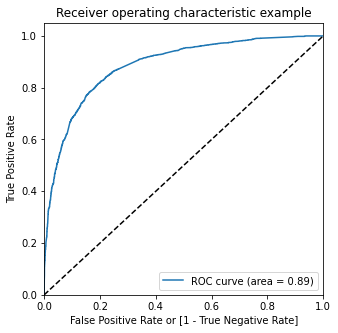

In [172]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under ROC curve is 0.88 

In [173]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.521462,1,1,1,1,1,1,1,0,0,0,0
1,1,0.699704,1,1,1,1,1,1,1,1,0,0,0
2,1,0.915406,1,1,1,1,1,1,1,1,1,1,1
3,0,0.052745,0,1,0,0,0,0,0,0,0,0,0
4,0,0.215426,0,1,1,1,0,0,0,0,0,0,0


In [174]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accuracy and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.380243,1.000000,0.000000
0.1,0.1,0.603907,0.969684,0.379489
0.2,0.2,0.749440,0.912421,0.649445
0.3,0.3,0.800512,0.844632,0.773444
0.4,0.4,0.815082,0.788211,0.831568
0.5,0.5,0.816042,0.705684,0.883751
0.6,0.6,0.803234,0.596632,0.929992
0.7,0.7,0.785783,0.517474,0.950400
0.8,0.8,0.761928,0.422316,0.970292
0.9,0.9,0.716619,0.274105,0.988117


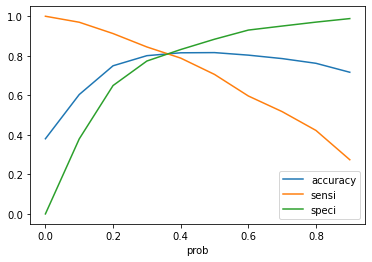

In [175]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.35.

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.521462,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.699704,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.915406,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.052745,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.215426,0,1,1,1,0,0,0,0,0,0,0,0


In [177]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.808837656099904

In [178]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3110,  761],
       [ 433, 1942]], dtype=int64)

In [179]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [180]:
# Calculating the sensitivity
TP/(TP+FN)

0.8176842105263158

In [181]:
# Calculating the specificity
TN/(TN+FP)

0.8034099715835701

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Prediction on Test set

In [182]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [183]:
col = X_train.columns

In [184]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Specialization_Other_Specialization,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7625,1.0,0,0.117647,0.713468,1,0,0,0,1,0,0,0,0,0,0
5207,1.0,0,0.235294,0.390405,1,0,0,0,1,0,0,0,0,0,0
2390,1.0,0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,1,0
4362,1.0,0,0.117647,0.102113,1,0,0,0,0,0,0,0,0,1,0
1023,1.0,0,0.882353,0.139525,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1.0,0,0.000000,0.000000,0,1,0,0,0,1,0,1,0,0,0
566,1.0,0,0.176471,0.106514,1,0,0,0,1,0,0,0,0,0,0
6433,1.0,0,0.058824,0.141285,1,0,0,0,0,0,0,1,0,0,0
898,1.0,0,0.117647,0.072183,1,0,0,0,0,0,0,0,0,0,0


In [185]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.681170
1,1,0.363605
2,1,0.273441
3,0,0.393193
4,0,0.273319


In [186]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.681170,1
1,1,0.363605,1
2,1,0.273441,0
3,0,0.393193,1
4,0,0.273319,0
...,...,...,...
2673,0,0.052745,0
2674,0,0.130601,0
2675,0,0.032676,0
2676,0,0.069641,0


In [187]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005974607916355

In [188]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1345,  339],
       [ 195,  799]], dtype=int64)

In [189]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [190]:
# Calculating the sensitivity
TP/(TP+FN)

0.8038229376257545

In [191]:
# Calculating the specificity
TN/(TN+FP)

0.7986935866983373

- With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision-Recall

In [192]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3421,  450],
       [ 699, 1676]], dtype=int64)

In [193]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7883349012229539

In [194]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7056842105263158

- With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

## Precision and recall tradeoff

In [195]:
from sklearn.metrics import precision_recall_curve

In [196]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: Predicted, Length: 6246, dtype: int64)

In [197]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

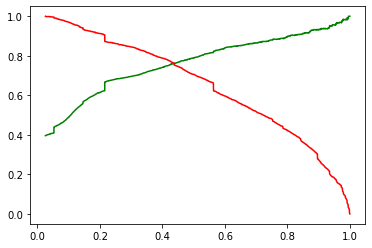

In [198]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [199]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.521462,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.699704,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.915406,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.052745,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.215426,0,1,1,1,0,0,0,0,0,0,0,0


In [200]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8160422670509125

In [201]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  557],
       [ 592, 1783]], dtype=int64)

In [202]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [203]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7619658119658119

In [204]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7507368421052631

#### With the current cut off as 0.44 we have Precision around 76% and Recall around 75% and accuracy 82 %.

## Prediction on Test set

In [205]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.681170
1,1,0.363605
2,1,0.273441
3,0,0.393193
4,0,0.273319


In [206]:
# Making prediction using cut off 0.44
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.681170,1
1,1,0.363605,0
2,1,0.273441,0
3,0,0.393193,0
4,0,0.273319,0
...,...,...,...
2673,0,0.052745,0
2674,0,0.130601,0
2675,0,0.032676,0
2676,0,0.069641,0


#### F1 = 2×(Precision*Recall)/(Precision+Recall)

## Check the overall accuracy

In [207]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8058252427184466

In [208]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1439,  245],
       [ 275,  719]], dtype=int64)

In [209]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [210]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.745850622406639

In [211]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7233400402414487

- With the current cut off as 0.44 we have Precision around 75% , Recall around 73% and accuracy 81%

#### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [ ]:
# F1 = 2*(Precision*Recall)/(Precision+Recall)
# F1

#### Classification Report

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1684
           1       0.75      0.72      0.73       994

    accuracy                           0.81      2678
   macro avg       0.79      0.79      0.79      2678
weighted avg       0.80      0.81      0.81      2678



### Finally, we have an overall accuracy of about 0.81 on our Logistic Regression model. That is, there is 81% chance that our predicted leads will be converted. This meets the CEO's target of atleast 80% lead conversion.

In [212]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.521462,1,1,1,1,1,1,1,0,0,0,0,1,52
1,1,0.699704,1,1,1,1,1,1,1,1,0,0,0,1,70
2,1,0.915406,1,1,1,1,1,1,1,1,1,1,1,1,92
3,0,0.052745,0,1,0,0,0,0,0,0,0,0,0,0,5
4,0,0.215426,0,1,1,1,0,0,0,0,0,0,0,0,22


In [225]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    1783
0     592
Name: final_predicted, dtype: int64

In [229]:
# check the precentage of final_predicted conversions on test data

1783/float(1783+502)

0.7803063457330416

#### Hence we can see that the final prediction of conversions have a target rate of 78% 